In [ ]:
import pandas as pd

In [77]:
import seaborn as sns

In [ ]:
df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")

In [ ]:
#See the data

In [ ]:
df.head(10)

In [ ]:
df.shape

In [ ]:
#clean data 

In [ ]:
#only want usa races, 50km or 50mi, 2020

In [ ]:
df[(df['Event distance/length'].isin(['50mi', '50km'])) & (df['Year of event'] == 2020)].shape

In [ ]:
df[df['Event name'] == 'Everglades 50 Mile Ultra Run (USA)']['Event name'].str.split('(').str.get(1).str.split(')').str.get(0)

In [ ]:
df[df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA']

In [ ]:
df2 = df[(df['Event distance/length'].isin(['50mi', '50km'])) & (df['Year of event'] == 2020) & (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA')]

In [ ]:
df2.head(10)

In [ ]:
# remove (USA) from event name

In [ ]:
df2['Event name'] = df2['Event name'].str.split('(').str.get(0)

In [ ]:
df2.head(10)

In [ ]:
#clean athlete age

In [ ]:
df2['athlete_age'] = 2020 - df2['Athlete year of birth']

In [ ]:
# remove h from athlete performance


In [ ]:
df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)

In [ ]:
df2.head(10)

In [ ]:
#drop columns: Athlete club, country, year of birth, age cat

In [ ]:
df2 = df2.drop(['Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'], axis = 1)

In [ ]:
#clean null vals

In [ ]:
df2.isna().sum()

In [ ]:
df2[df2['athlete_age'].isna()==1]

In [ ]:
df2 = df2.dropna()

In [ ]:
df2.shape

In [ ]:
#check for dups

In [ ]:
df2[df2.duplicated() == True]

In [ ]:
#reset index

In [ ]:
df2.reset_index(drop = True)

In [ ]:
df2['athlete_age'] = df2['athlete_age'].astype(int)

In [ ]:
df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)

In [ ]:
#rename columns 

In [ ]:
df2.dtypes


In [ ]:
#Year of event                  int64
#Event dates                   object
#Event name                    object
#Event distance/length         object
#Event number of finishers      int64
#Athlete performance           object
#Athlete gender                object
#Athlete average speed        float64
#Athlete ID                     int64
#athlete_age                    int64

In [ ]:
df2 = df2.rename(columns = {'Year of event' : 'year',
                            'Event dates' : 'race_day',
                            'Event name' : 'race_name',
                            'Event distance/length' : 'race_length',
                            'Event number of finishers' : 'race_number_of_finishers',
                            'Athlete performance' : 'athlete_performance',
                            'Athlete gender' : 'athlete_gender',
                            'Athlete average speed' : 'athlete_average_speed',
                            'athete_id' : 'athlete_id',
})

In [ ]:
df2.head(10)

In [94]:
df3 = df2[['race_day', 'race_name', 'race_length', 'race_number_of_finishers', 'athlete_age', 'athlete_id','athlete_gender','athlete_performance','athlete_average_speed']]

In [95]:
df3.head()

,race_day,race_name,race_length,race_number_of_finishers,athlete_age,athlete_id,athlete_gender,athlete_performance,athlete_average_speed
2539945,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,29,71287,M,3:17:55,15.158
2539946,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,39,629508,M,4:02:32,12.369
2539947,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,21,64838,M,4:07:57,12.099
2539948,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,37,704450,M,4:22:02,11.449
2539949,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,43,810281,M,4:27:34,11.212


In [96]:
#find 2 races in 2020 - sarasota everglades

In [97]:
df3[df3['race_name'] == 'Everglades 50 Mile Ultra Run ']

,race_day,race_name,race_length,race_number_of_finishers,athlete_age,athlete_id,athlete_gender,athlete_performance,athlete_average_speed
2591476,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,27,820757,M,8:31:39,9.436
2591477,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,39,46432,M,8:31:48,9.433
2591478,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,34,813617,M,8:34:43,9.380
2591479,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,33,820758,M,9:07:35,8.817
2591480,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,30,647115,M,9:15:32,8.691
2591481,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,26,696063,M,9:18:05,8.651
2591482,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,23,222509,M,9:19:10,8.634
2591483,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,36,820759,M,9:20:51,8.608
2591484,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,26,359359,F,9:26:15,8.526
2591485,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,42,103020,M,9:26:16,8.526


In [98]:
df3[df3['athlete_id'] == 222509]

,race_day,race_name,race_length,race_number_of_finishers,athlete_age,athlete_id,athlete_gender,athlete_performance,athlete_average_speed
2591482,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,23,222509,M,9:19:10,8.634
2616900,22.02.2020,Manasota Track Club 50K,50km,36,23,222509,M,4:49:16,10.371


In [99]:
#charts and graphs

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='race_length', ylabel='Count'>

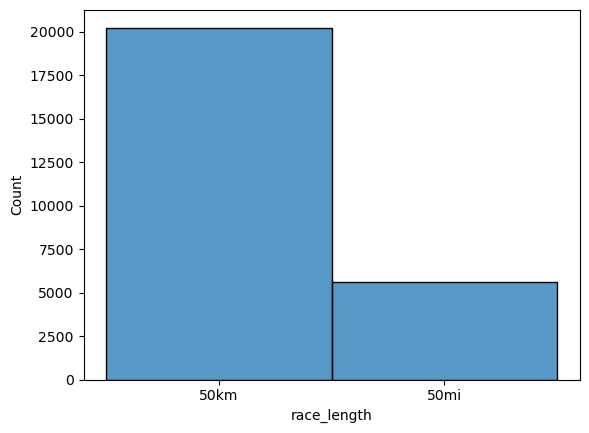

In [100]:
sns.histplot(df3['race_length'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='race_length', ylabel='Count'>

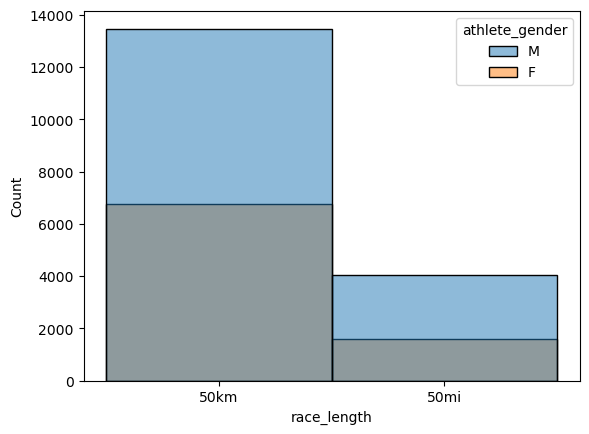

In [101]:
sns.histplot(df3, x = 'race_length', hue = 'athlete_gender')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


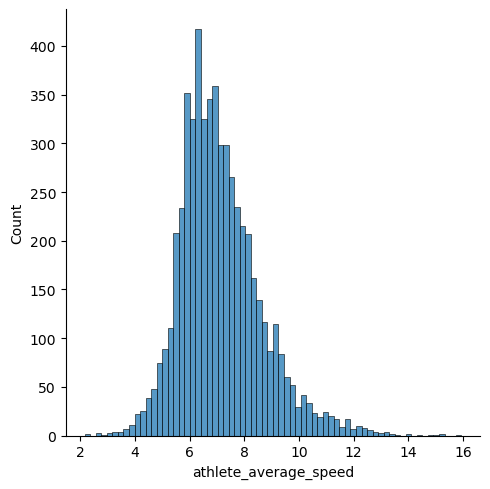

In [102]:
sns.displot(df3[df3['race_length'] == '50mi']['athlete_average_speed'])

<Axes: xlabel='race_length', ylabel='athlete_average_speed'>

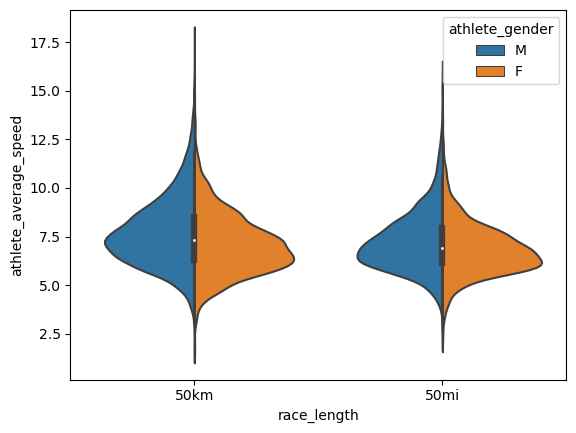

In [104]:
sns.violinplot(data = df3, x = 'race_length', y = 'athlete_average_speed', hue = 'athlete_gender', split = True)

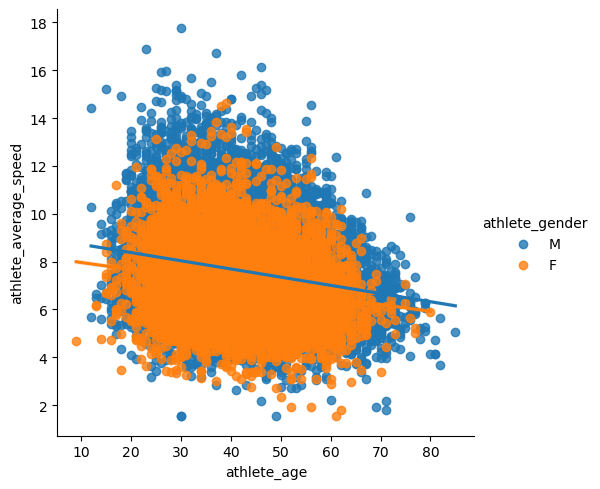

In [105]:
sns.lmplot(data = df3, x = 'athlete_age', y = 'athlete_average_speed', hue = 'athlete_gender')

In [ ]:
# questions i want to find out

In [ ]:
#Difference in speed for the 50k, 50mi male to female

In [106]:
df3.groupby(['race_length', 'athlete_gender'])['athlete_average_speed'].mean()

race_length  athlete_gender
50km         F                 7.083011
             M                 7.738985
50mi         F                 6.834371
             M                 7.257633
Name: athlete_average_speed, dtype: float64

In [ ]:
#what age groups are best in 50mi race(20+ races min)

In [108]:
df3.query('race_length == "50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean','count']).sort_values('mean', ascending = False).query('count>19').head(15)

,mean,count
athlete_age,,
29,7.902252,135
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.540923,91
31,7.451638,138
38,7.430022,231
35,7.422359,195
36,7.403854,185


In [ ]:
#Seasons for the data -> Slower in summer than winter?

#spring 3-5
#Summer 6-8 
#fall 9-11
#winter 12-2

#split between 2 decimals

In [109]:
df3['race_month'] = df3['race_day'].str.split('.').str.get(1).astype(int)

In [111]:
df3.head(50)

,race_day,race_name,race_length,race_number_of_finishers,athlete_age,athlete_id,athlete_gender,athlete_performance,athlete_average_speed,race_month
2539945,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,29,71287,M,3:17:55,15.158,2
2539946,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,39,629508,M,4:02:32,12.369,2
2539947,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,21,64838,M,4:07:57,12.099,2
2539948,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,37,704450,M,4:22:02,11.449,2
2539949,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,43,810281,M,4:27:34,11.212,2
2539950,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,35,810282,F,4:42:06,10.635,2
2539951,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,59,11739,M,4:49:20,10.369,2
2539952,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,50,80394,M,4:49:50,10.351,2
2539953,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,45,140909,F,4:51:00,10.309,2
2539954,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,41,753889,M,5:02:35,9.915,2


In [121]:
df3['race_season'] = df3['race_month'].apply(lambda x: 'Winter' if x > 11 else 'Fall' if x > 8 else 'Summer' if x > 5 else 'Spring' if x > 2 else 'Winter')

In [122]:
df3.head(25)

,race_day,race_name,race_length,race_number_of_finishers,athlete_age,athlete_id,athlete_gender,athlete_performance,athlete_average_speed,race_month,race_season
2539945,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,29,71287,M,3:17:55,15.158,2,Winter
2539946,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,39,629508,M,4:02:32,12.369,2,Winter
2539947,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,21,64838,M,4:07:57,12.099,2,Winter
2539948,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,37,704450,M,4:22:02,11.449,2,Winter
2539949,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,43,810281,M,4:27:34,11.212,2,Winter
2539950,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,35,810282,F,4:42:06,10.635,2,Winter
2539951,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,59,11739,M,4:49:20,10.369,2,Winter
2539952,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,50,80394,M,4:49:50,10.351,2,Winter
2539953,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,45,140909,F,4:51:00,10.309,2,Winter
2539954,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,41,753889,M,5:02:35,9.915,2,Winter


In [123]:
df3.groupby('race_season')['athlete_average_speed'].agg(['mean','count']).sort_values('mean', ascending = False)

,mean,count
race_season,,
Spring,7.684430,3294
Winter,7.518187,11595
Fall,7.406619,8315
Summer,6.869336,2653
